## Adedamola Bowale (A0353496) Credit card Default: A predictive analysis


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from sklearn.preprocessing import StandardScaler
!pip install imblearn
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, classification_report, recall_score, f1_score, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

## Data Pre-processing

In [2]:
#Loading the data 
df = pd.read_csv("data.csv")

In [3]:
#check the first 5 rows in the data
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
#To get a summarized information of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
#To check if there are any duplicates
df.duplicated().sum()

0

Text(0, 0.5, 'Values')

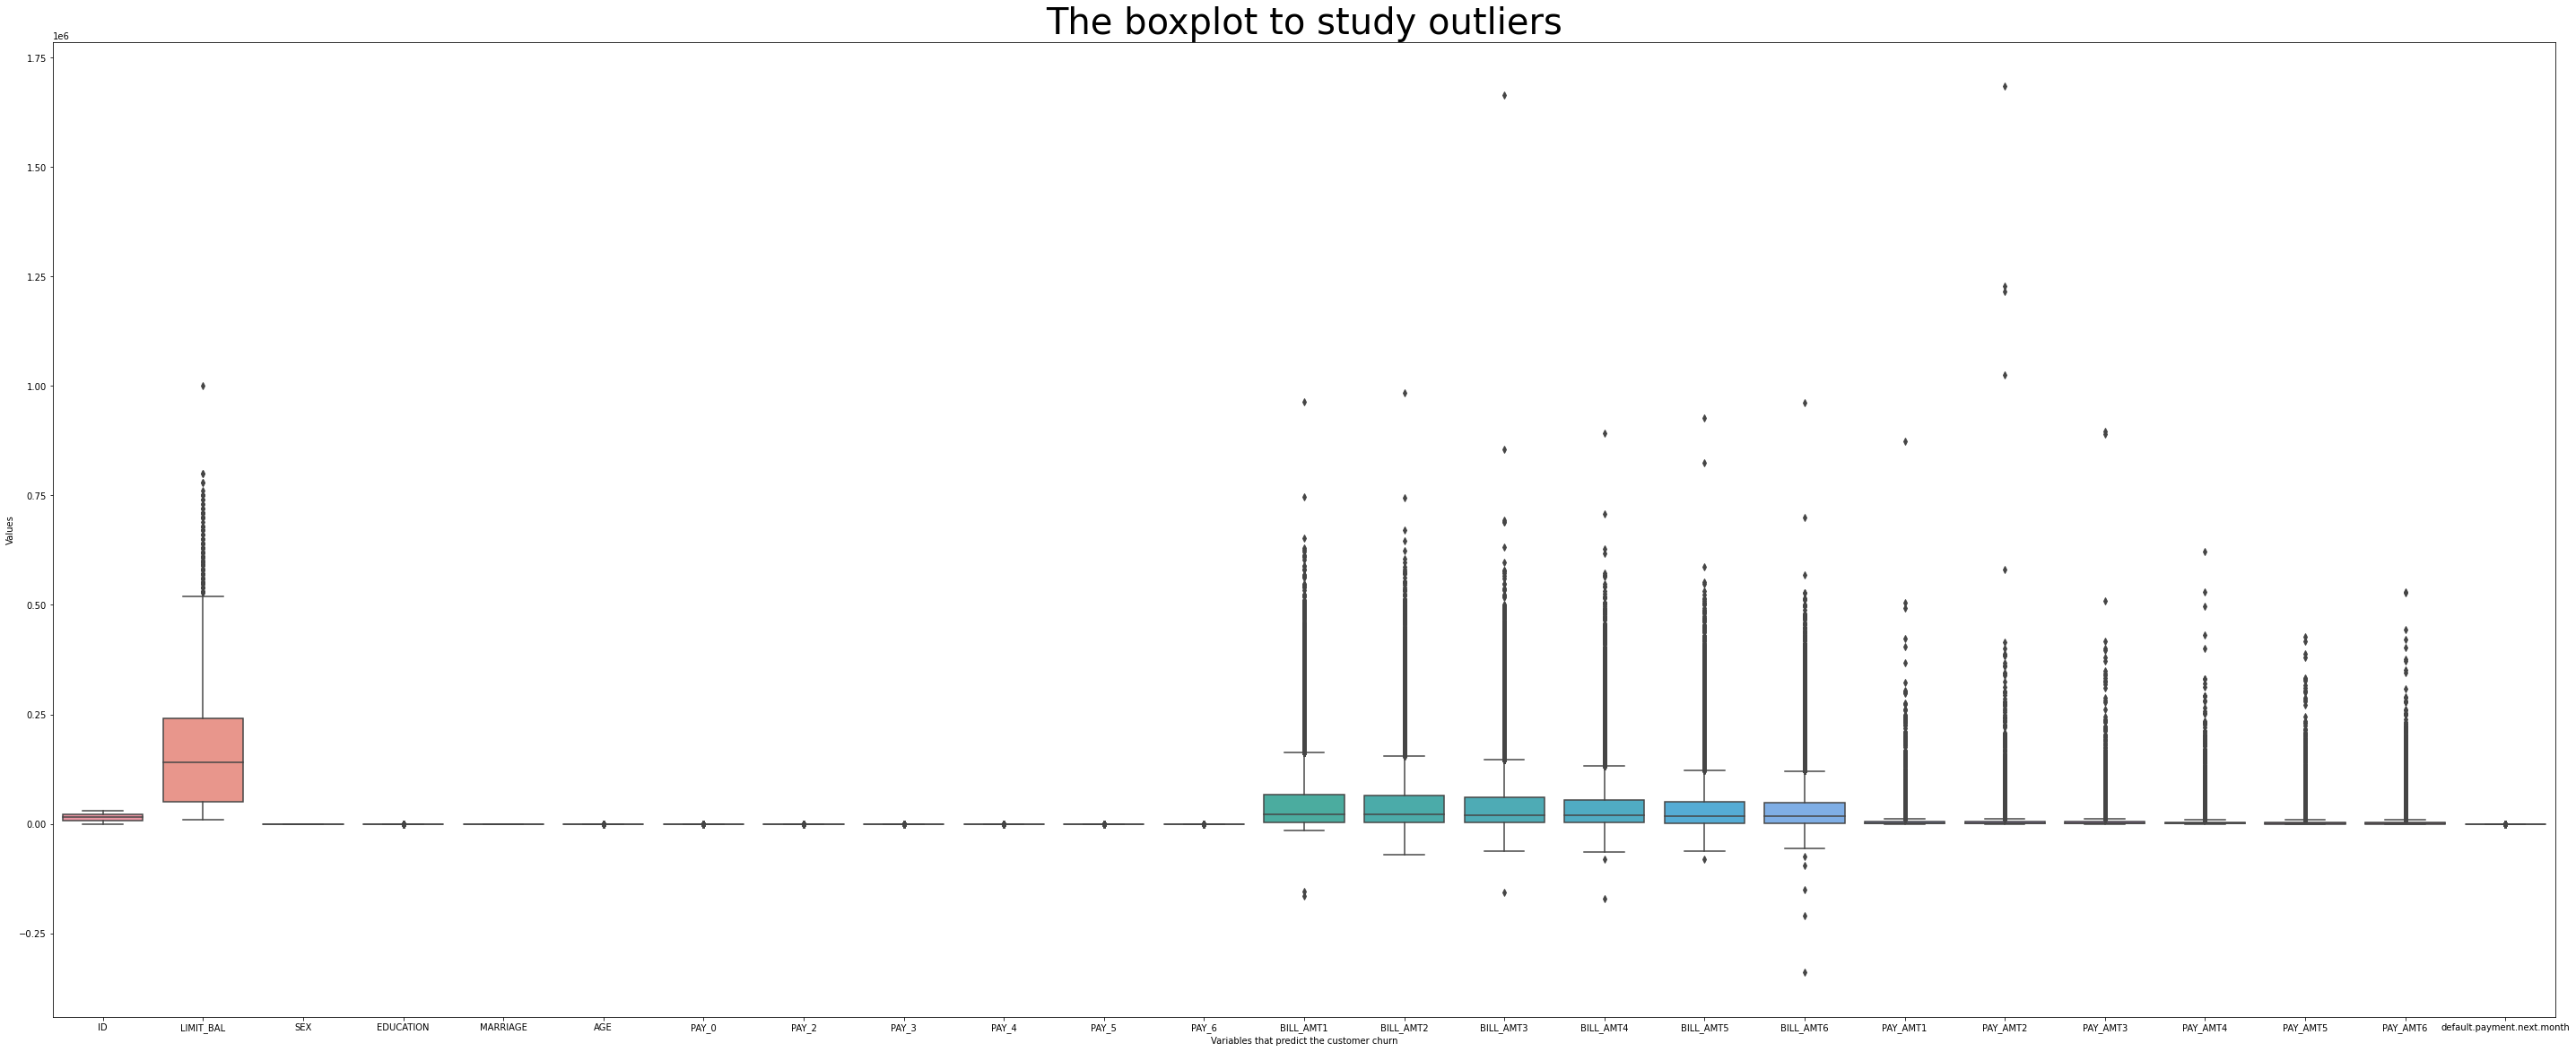

In [6]:
#Plot Box plot to check outliers
plt.figure(figsize=(50,20))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers',fontsize=40)
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

In [7]:
# Checking unique cardinality
df.nunique()


ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [8]:
#Transpose and Describe the dataset for statistical understanding
df.describe() .T #Transpose

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [9]:
#Check shape
df.shape

(30000, 25)

In [10]:
#Check Null values per column
print('Number of Null values')
print(df.isnull().sum())
print()

Number of Null values
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64



## Data Cleaning

In [11]:
#Renaming Column
df.rename(columns = {'PAY_0':'PAY_1', 'default.payment.next.month':'Default'}, inplace = True) 

In [12]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [13]:
#Drop the ID Column
df.drop(['ID'], axis=1, inplace=True)
print(df.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')


In [14]:
#Rename column
df = df.rename(columns={'PAY_0':'PAY_1'})

In [15]:
#Check value count for Education Column
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [16]:
#Merge 0,5,and 6 into 4
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(0,5)
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(6,5)
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(5,4)

In [17]:
#check value count again
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

## EXploratory Data Analysis

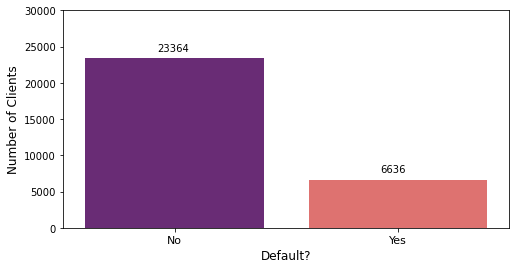

In [18]:
plt.figure(figsize=(8,4))

ax = sns.countplot(x="Default", data=df, palette="magma")

plt.xlabel("Default?", fontsize= 12)
plt.ylabel("Number of Clients", fontsize= 12)
plt.ylim(0,30000)
plt.xticks([0,1], ['No', 'Yes'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+1000))
plt.savefig('TC1.png', dpi=300, bbox_inches='tight')   
plt.show()

In [19]:
object_cat = df.select_dtypes(include="object")
for col in object_cat.columns[:-1]:
    fig, ax = plt.subplots()
    df[col][object_cat["1"] == "Yes"].value_counts().plot.bar()
    plt.title(f"Frequency distribution of {col} rates\n"
              f"of people with heart disease")

Distribution of Sex Column Status

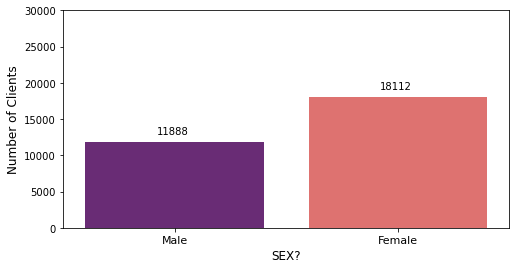

In [20]:
plt.figure(figsize=(8,4))

ax = sns.countplot(x="SEX", data=df, palette="magma")

plt.xlabel("SEX?", fontsize= 12)
plt.ylabel("Number of Clients", fontsize= 12)
plt.ylim(0,30000)
plt.xticks([0,1], ['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+1000))
    
plt.show()

Sex by default

In [21]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

In [22]:
df['AgeBin'] = pd.cut(df['AGE'],[20, 30, 40, 50, 80])
print(df['AgeBin'].value_counts())

(20, 30]    11013
(30, 40]    10713
(40, 50]     6005
(50, 80]     2269
Name: AgeBin, dtype: int64


In [23]:
data11 = df.copy()
data11['SEX'] = data11['SEX'].map({1: 'male', 2: 'female'})
data11['EDUCATION'] = data11['EDUCATION'].map({1 :'graduate school', 2: 'university', 3: 'high school', 4: 'others', 5: 'others', 6: 'others'})
data11['MARRIAGE'] = data11['MARRIAGE'].map({1: 'married', 2: 'single', 3: 'others'})
data11.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,AgeBin
0,20000.0,female,university,married,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,"(20, 30]"
1,120000.0,female,university,single,26,-1,2,0,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,"(20, 30]"
2,90000.0,female,university,single,34,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,"(30, 40]"
3,50000.0,female,university,married,37,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,"(30, 40]"
4,50000.0,male,university,married,57,-1,0,-1,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,"(50, 80]"


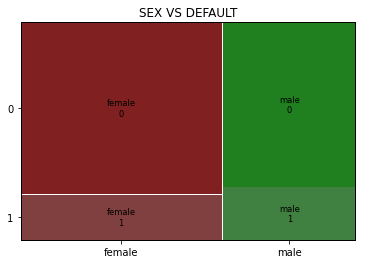

In [24]:
mosaic(data11,['SEX','Default'], title='SEX VS DEFAULT')
plt.savefig('sexDef.png', dpi=300, bbox_inches='tight')
plt.show()

In [25]:
male_df = data11[(data11['SEX'] == 'male')]
female_df = data11[(data11['SEX'] == 'female')]

married_df = data11[(data11['MARRIAGE'] == 'married')]
single_df = data11[(data11['MARRIAGE'] == 'single')]
others_df = data11[(data11['MARRIAGE'] == 'others')]

bin1_df = data11[(data11['AGE'] < 30)]
bin2_df = (data11[(data11['AGE'] >= 30) & (data11['AGE'] < 40)])
bin3_df = data11[(data11['AGE'] >= 40) & (data11['AGE'] < 50)]
bin4_df = data11[(data11['AGE'] >= 50)]
                  

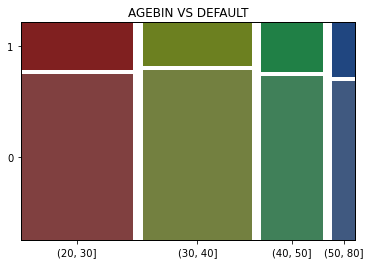

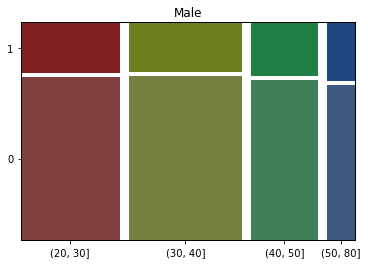

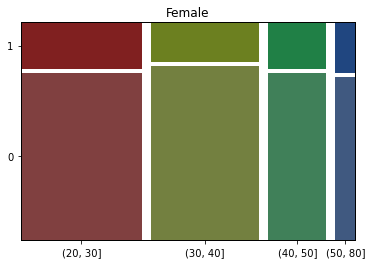

In [26]:
props = {}
# Dictionary introduced here
col_dic = {0: 'yellow', 1: 'blue'}
for x in ['(20, 30]', '(30, 40]', '(40, 50]', '(50, 80]']:
    for y, col in col_dic.items():
        props[(x, y)] ={'color': col}

#df = pd.DataFrame({'size' : ['small', 'large', 'large', 'small', 'large', 'small', 'large', 'large'], 'length' : ['long', 'short', 'medium', 'medium', 'medium', 'short', 'long', 'medium']})

#mosaic(df, ['AgeBin','Default'], properties=props,gap=0.025, labelizer=lambda k: '')

mosaic(data11.sort_values('Default'),['AgeBin','Default'],properties=props,gap=0.03, labelizer=lambda k: '' , title='AGEBIN VS DEFAULT')
plt.savefig('plot1.png', dpi=300, bbox_inches='tight')
mosaic(male_df.sort_values('AgeBin'),['AgeBin','Default'], properties=props,gap=0.03, labelizer=lambda k: '', title='Male')
plt.savefig('plot2.png', dpi=300, bbox_inches='tight')
mosaic(female_df.sort_values('Default'),['AgeBin','Default'],properties=props,gap=0.03, labelizer=lambda k: '' , title='Female')
plt.savefig('plot3.png', dpi=300, bbox_inches='tight')


# Part added by me based on the linked answer
legenditems = [(plt.Rectangle((0,0),1,1, color=col_dic[c]), "%s" %c)
                 for i,c in enumerate(df['Default'].unique().tolist())]
#plt.legend(*zip(*legenditems))

plt.show()

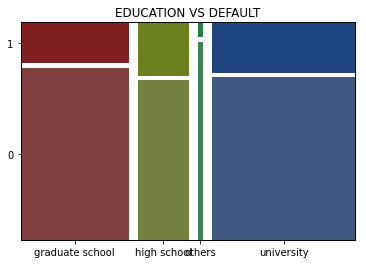

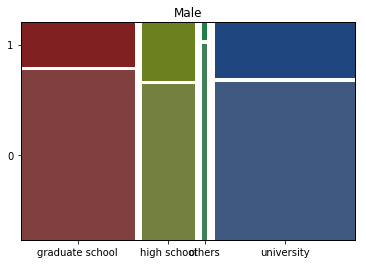

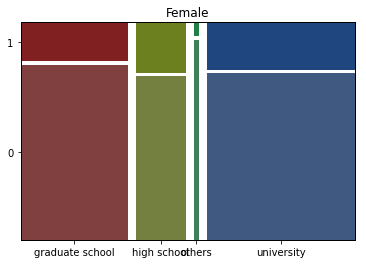

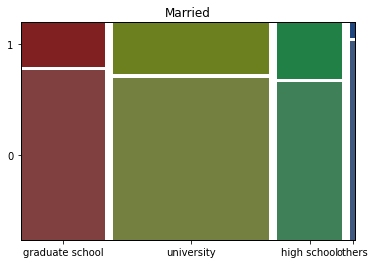

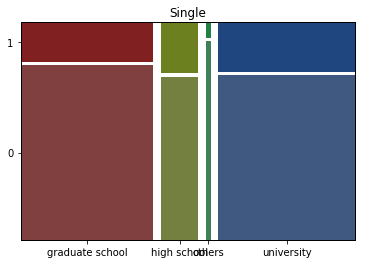

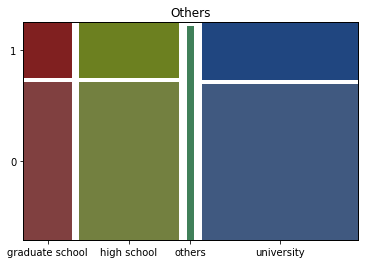

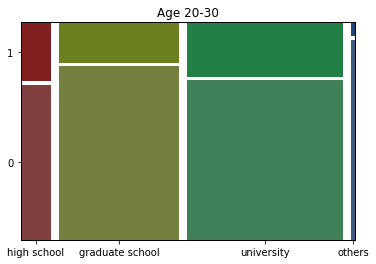

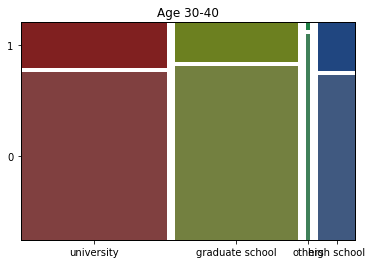

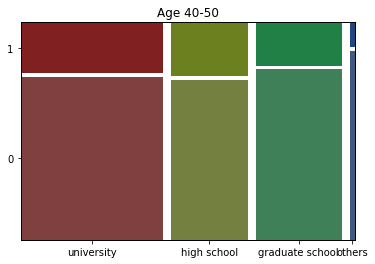

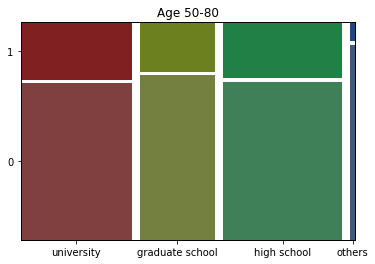

In [27]:
props = {}
# Dictionary introduced here
col_dic = {0: 'yellow', 1: 'blue'}
for x in ['graduate school', 'university','high school', 'others']:
    for y, col in col_dic.items():
        props[(x, y)] ={'color': col}

#df = pd.DataFrame({'size' : ['small', 'large', 'large', 'small', 'large', 'small', 'large', 'large'], 'length' : ['long', 'short', 'medium', 'medium', 'medium', 'short', 'long', 'medium']})

#mosaic(df, ['AgeBin','Default'], properties=props,gap=0.025, labelizer=lambda k: '')

mosaic(data11.sort_values('EDUCATION'),['EDUCATION','Default'],properties=props,gap=0.03, labelizer=lambda k: '' , title='EDUCATION VS DEFAULT')
plt.savefig('plot1.png', dpi=300, bbox_inches='tight')
mosaic(male_df.sort_values('EDUCATION'),['EDUCATION','Default'], properties=props,gap=0.025, labelizer=lambda k: '', title='Male')
plt.savefig('plot2.png', dpi=300, bbox_inches='tight')
mosaic(female_df.sort_values('EDUCATION'),['EDUCATION','Default'],properties=props,gap=0.025, labelizer=lambda k: '' , title='Female')
plt.savefig('plot3.png', dpi=300, bbox_inches='tight')

mosaic(married_df.sort_values('Default'),['EDUCATION','Default'], properties=props,gap=0.025, labelizer=lambda k: '', title='Married')
plt.savefig('plot4.png', dpi=300, bbox_inches='tight')
mosaic(single_df.sort_values('EDUCATION'),['EDUCATION','Default'],properties=props,gap=0.025, labelizer=lambda k: '' , title='Single')
plt.savefig('plot5.png', dpi=300, bbox_inches='tight')
mosaic(others_df.sort_values('EDUCATION'),['EDUCATION','Default'], properties=props,gap=0.025, labelizer=lambda k: '', title='Others')
plt.savefig('plot6.png', dpi=300, bbox_inches='tight')

mosaic(bin1_df.sort_values('Default'),['EDUCATION','Default'], properties=props,gap=0.025, labelizer=lambda k: '', title='Age 20-30')
plt.savefig('plot7.png', dpi=300, bbox_inches='tight')
mosaic(bin2_df.sort_values('Default'),['EDUCATION','Default'],properties=props,gap=0.025, labelizer=lambda k: '' , title='Age 30-40')
plt.savefig('plot8.png', dpi=300, bbox_inches='tight')
mosaic(bin3_df.sort_values('Default'),['EDUCATION','Default'], properties=props,gap=0.025, labelizer=lambda k: '', title='Age 40-50')
plt.savefig('plot9.png', dpi=300, bbox_inches='tight')
mosaic(bin4_df.sort_values('MARRIAGE'),['EDUCATION','Default'],properties=props,gap=0.025, labelizer=lambda k: '' , title='Age 50-80')
plt.savefig('plot10.png', dpi=300, bbox_inches='tight')

# Part added by me based on the linked answer
legenditems = [(plt.Rectangle((0,0),1,1, color=col_dic[c]), "%s" %c)
                 for i,c in enumerate(df['Default'].unique().tolist())]
#plt.legend(*zip(*legenditems))

plt.show()

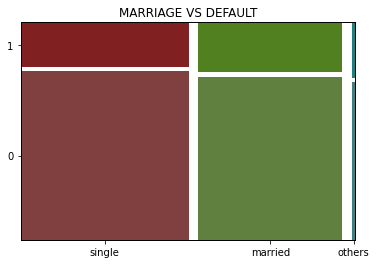

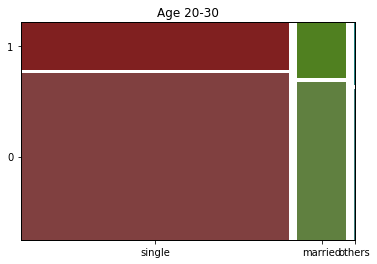

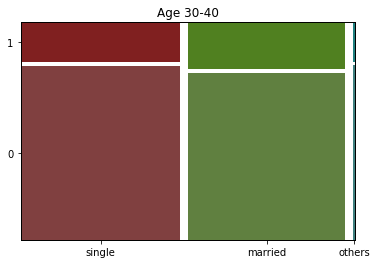

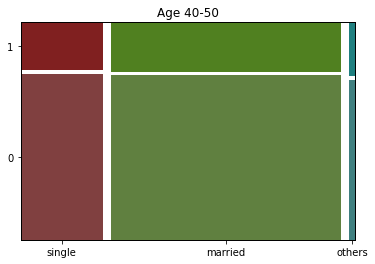

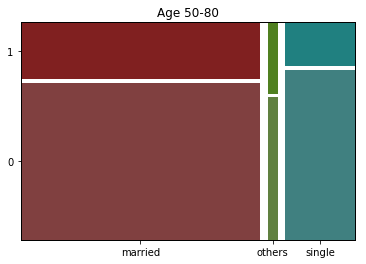

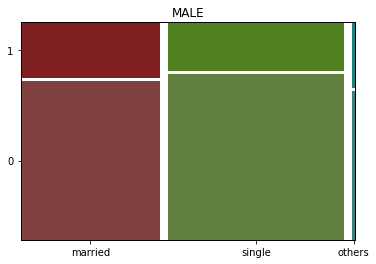

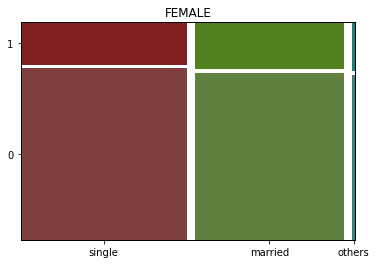

In [28]:
props = {}
# Dictionary introduced here
col_dic = {0: 'yellow', 1: 'blue'}
for x in ['married', 'single', 'others']:
    for y, col in col_dic.items():
        props[(x, y)] ={'color': col}

#df = pd.DataFrame({'size' : ['small', 'large', 'large', 'small', 'large', 'small', 'large', 'large'], 'length' : ['long', 'short', 'medium', 'medium', 'medium', 'short', 'long', 'medium']})

#mosaic(df, ['AgeBin','Default'], properties=props,gap=0.025, labelizer=lambda k: '')

mosaic(data11.sort_values('Default'),['MARRIAGE','Default'],properties=props,gap=0.03, labelizer=lambda k: '' , title='MARRIAGE VS DEFAULT')
mosaic(bin1_df.sort_values('Default'),['MARRIAGE','Default'], properties=props,gap=0.025, labelizer=lambda k: '', title='Age 20-30')
mosaic(bin2_df.sort_values('Default'),['MARRIAGE','Default'],properties=props,gap=0.025, labelizer=lambda k: '' , title='Age 30-40')
mosaic(bin3_df.sort_values('Default'),['MARRIAGE','Default'], properties=props,gap=0.025, labelizer=lambda k: '', title='Age 40-50')
mosaic(bin4_df.sort_values('MARRIAGE'),['MARRIAGE','Default'],properties=props,gap=0.025, labelizer=lambda k: '' , title='Age 50-80')

mosaic(male_df.sort_values('Default'),['MARRIAGE','Default'], properties=props,gap=0.025, labelizer=lambda k: '', title='MALE')
plt.savefig('plot1.png', dpi=300, bbox_inches='tight')
mosaic(female_df.sort_values('Default'),['MARRIAGE','Default'],properties=props,gap=0.025, labelizer=lambda k: '' , title='FEMALE')
plt.savefig('plot2.png', dpi=300, bbox_inches='tight')




# Part added by me based on the linked answer
legenditems = [(plt.Rectangle((0,0),1,1, color=col_dic[c]), "%s" %c)
                 for i,c in enumerate(df['Default'].unique().tolist())]
#plt.legend(*zip(*legenditems))

plt.show()

In [29]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,AgeBin
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,"(20, 30]"
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,"(20, 30]"
2,90000.0,2,2,2,34,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,"(30, 40]"
3,50000.0,2,2,1,37,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,"(30, 40]"
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,"(50, 80]"


### Understanding Limit_Balance

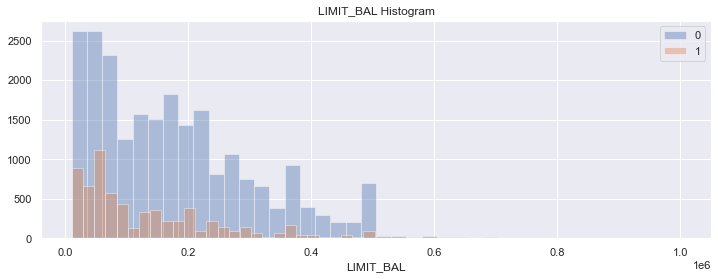

In [30]:
sns.set()
fig = plt.figure(figsize = (12,4))
ax = plt.subplot()

sns.distplot(df["LIMIT_BAL"][df['Default']==0], bins = 40, label = '0',kde = False)
sns.distplot(df["LIMIT_BAL"][df['Default']==1], bins = 40, label = '1',kde = False)

plt.legend(loc = 'upper right')
plt.title("LIMIT_BAL Histogram")
fig.show()

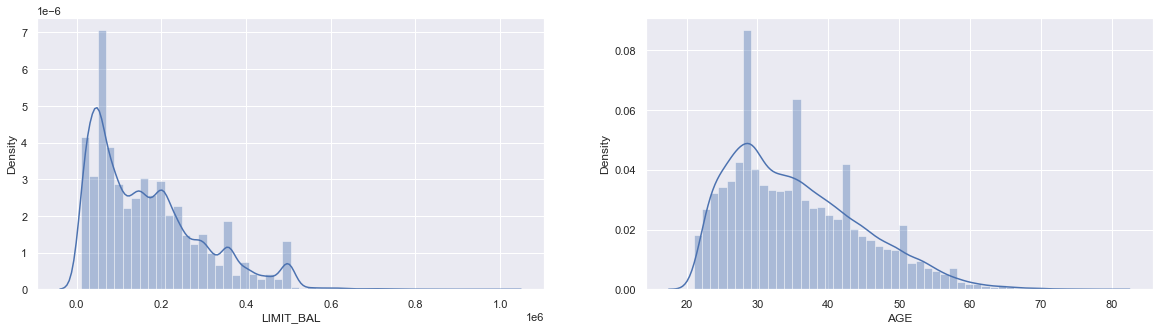

In [31]:
#Histogram/Density plot for LIMIT_BAL and AGE
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df.LIMIT_BAL)

plt.subplot(122)
sns.distplot(df.AGE)

plt.show()

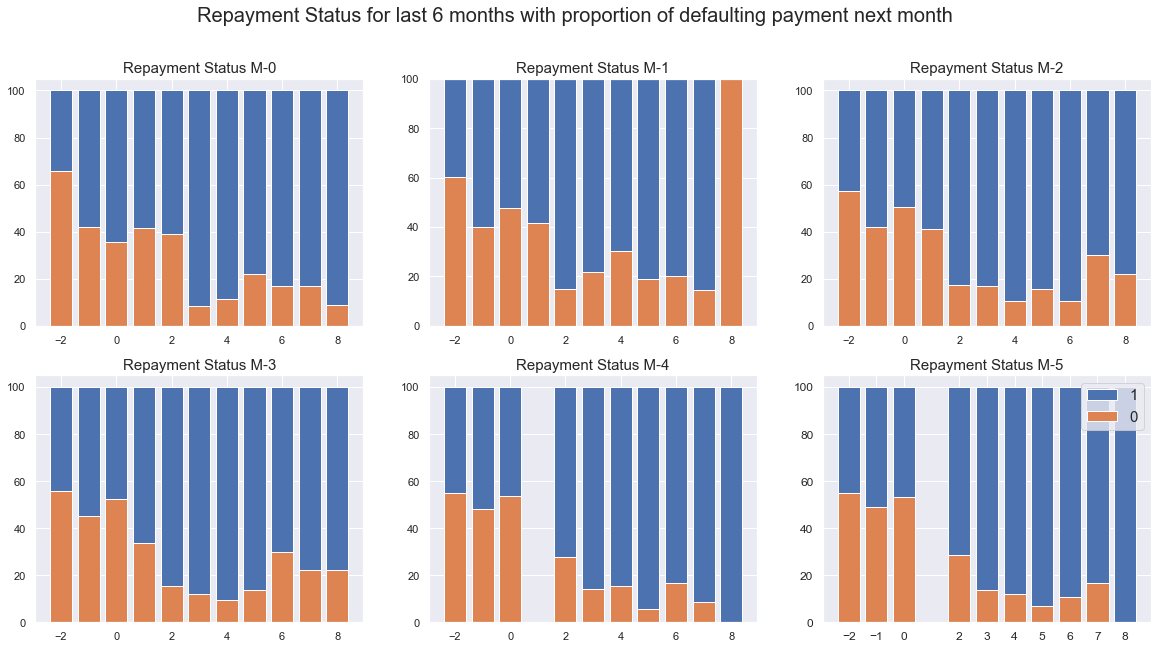

In [32]:
plt.subplots(figsize=(20,10))

ind = sorted(df.PAY_1.unique())
pay_0 = (df.PAY_1[df['Default'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_1[df['Default'] == 1].value_counts(normalize=True))
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(231)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-0", fontsize=15)

ind = sorted(df.PAY_2.unique())
pay_0 = (df.PAY_2[df['Default'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_2[df['Default'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(232)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-1", fontsize=15)

ind = sorted(df.PAY_3.unique())
pay_0 = (df.PAY_3[df['Default'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_3[df['Default'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(233)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-2", fontsize=15)

ind = sorted(df.PAY_4.unique())
pay_0 = (df.PAY_4[df['Default'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_4[df['Default'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(234)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-3", fontsize=15)

ind = sorted(df.PAY_5.unique())
pay_0 = (df.PAY_5[df['Default'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_5[df['Default'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(235)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-4", fontsize=15)

ind = sorted(df.PAY_6.unique())
pay_0 = (df.PAY_6[df['Default'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_6[df['Default'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(236)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-5", fontsize=15)

plt.xticks(ind, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper right", fontsize=15)
plt.suptitle("Repayment Status for last 6 months with proportion of defaulting payment next month", fontsize=20)

plt.show()

In [33]:
#Above plot shows us the proportion of clients that will default payment next month based on repayment history.
#For Current month status, the earlier the payment is made lesser are the chances of those clients defaulting the payment.

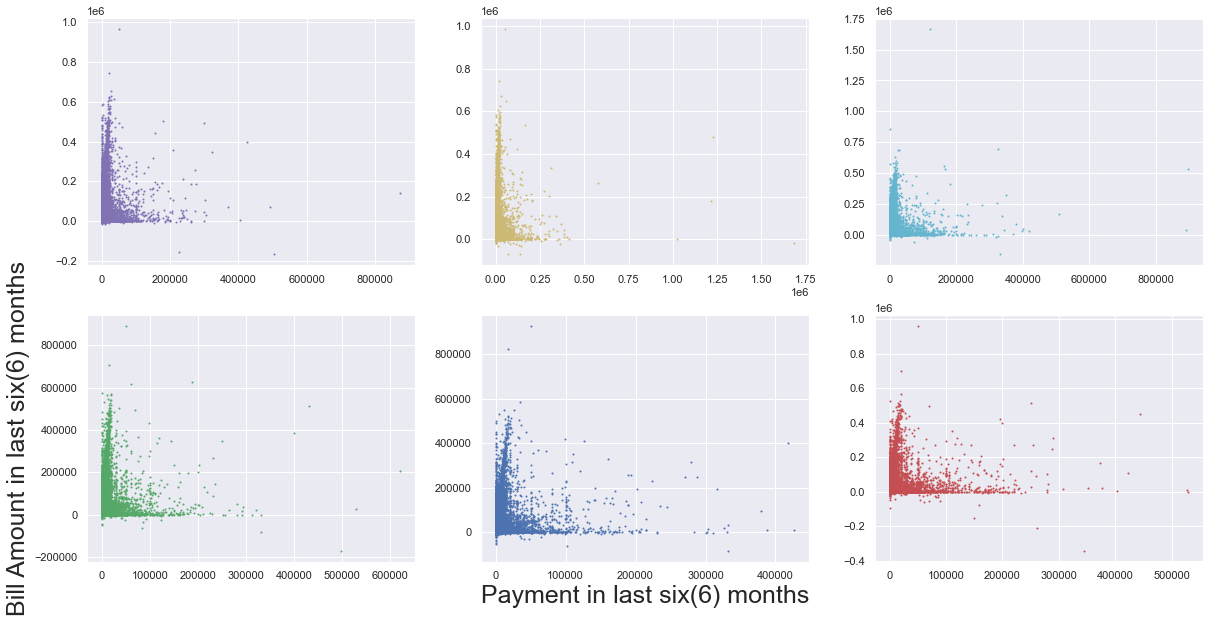

In [34]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='m', s=1)

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='y', s=1)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='c', s=1)

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='g', s=1)
plt.ylabel("Bill Amount in last six(6) months", fontsize=25)

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='b', s=1)
plt.xlabel("Payment in last six(6) months", fontsize=25)

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='r', s=1)

plt.show()

## Feature Selection

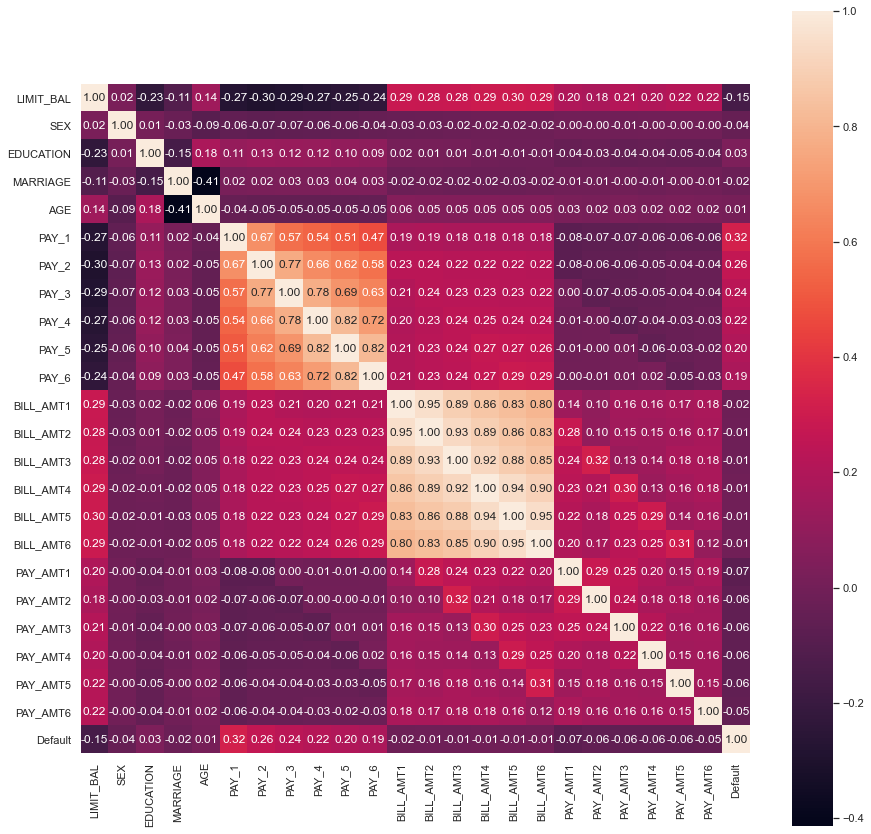

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f', square=True)
plt.show()
#Multicollinearity detected among the PAY and BILL variables

In [36]:
#BILL_AMT have quite strong correlation among the 6 months.
#We can also see the correlation between LIMIT_BAL and BILL_AMT
#There is also some correlation between BILL_AMT and PAY_AMT from one month before

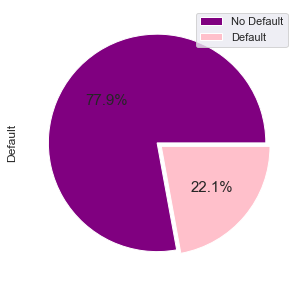

In [37]:
#Bringing back default column to check for Imbalance
plt.figure(figsize=(7,5))

df['Default'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['purple','pink'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['No Default', 'Default'])
plt.savefig('TC.png', dpi=300, bbox_inches='tight')
plt.show()

In [38]:
#Duplicate Dataset
df2 = df.copy()

In [39]:
df2.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,AgeBin
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,"(20, 30]"
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,"(20, 30]"
2,90000.0,2,2,2,34,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,"(30, 40]"
3,50000.0,2,2,1,37,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,"(30, 40]"
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,"(50, 80]"


In [40]:
corr_matrix = df2.corr().abs()

In [41]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [42]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.65)]

In [43]:
#Drop highly correlated columns
df1 = df2.drop(df2[to_drop], axis=1)

In [44]:
#Replacing non-binary categorical with one-hot-encoding
df1 = pd.get_dummies(df1,columns=['EDUCATION','MARRIAGE'])
df1.head()

,LIMIT_BAL,SEX,AGE,PAY_1,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,...,Default,AgeBin,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000.0,2,24,2,3913.0,0.0,689.0,0.0,0.0,0.0,...,1,"(20, 30]",0,1,0,0,0,1,0,0
1,120000.0,2,26,-1,2682.0,0.0,1000.0,1000.0,1000.0,0.0,...,1,"(20, 30]",0,1,0,0,0,0,1,0
2,90000.0,2,34,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,...,0,"(30, 40]",0,1,0,0,0,0,1,0
3,50000.0,2,37,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,...,0,"(30, 40]",0,1,0,0,0,1,0,0
4,50000.0,1,57,-1,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,...,0,"(50, 80]",0,1,0,0,0,1,0,0


In [45]:
#Seperating dependent and independent values
x =  df1.drop(axis=1,columns=['Default', 'AgeBin'])
y = df1['Default']

In [46]:
x

,LIMIT_BAL,SEX,AGE,PAY_1,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000.0,2,24,2,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0
1,120000.0,2,26,-1,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,0,1,0,0,0,0,1,0
2,90000.0,2,34,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,1,0,0,0,0,1,0
3,50000.0,2,37,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,1,0,0,0,1,0,0
4,50000.0,1,57,-1,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,39,0,188948.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,0,1,0,0,1,0,0
29996,150000.0,1,43,-1,1683.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,0,1,0,0,0,1,0
29997,30000.0,1,37,4,3565.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,0,1,0,0,0,0,1,0
29998,80000.0,1,41,1,-1645.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,0,0,1,0,0,1,0,0


## Normalization

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()

In [49]:
#Normalization
df1_scaled = scaler.fit_transform(x)

In [50]:
from pandas import DataFrame

In [51]:
dataset = DataFrame(df1_scaled)

In [52]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.010101,1.0,0.051724,0.4,0.149982,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.111111,1.0,0.086207,0.1,0.148892,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.080808,1.0,0.224138,0.2,0.172392,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.040404,1.0,0.275862,0.2,0.188100,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.040404,0.0,0.620690,0.1,0.154144,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [53]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_1', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_0', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In [54]:
 dataset.columns = ['LIMIT_BAL', 'SEX', 'AGE', 'PAY_1', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_0', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3']

In [55]:
dataset.head()

,LIMIT_BAL,SEX,AGE,PAY_1,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,0.010101,1.0,0.051724,0.4,0.149982,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.111111,1.0,0.086207,0.1,0.148892,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.080808,1.0,0.224138,0.2,0.172392,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.040404,1.0,0.275862,0.2,0.188100,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.040404,0.0,0.620690,0.1,0.154144,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Train and Test Split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X = dataset.copy()

In [58]:
#Train and Test SPlit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1)

In [59]:
X.shape

(30000, 19)

In [60]:
X_train.shape

(21000, 19)

## Applying Oversampling Method

In [61]:
oversample = SMOTE()
#smote = oversample(sampling_strategy='minority')
X_train_ovsmp, y_train_ovsmp = oversample.fit_resample(X_train, y_train)

In [62]:
rus = RandomUnderSampler(random_state=0)
rus.fit(X_train, y_train)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [63]:
X_train_ovsmp.shape

(32728, 19)

In [64]:
X_resampled.shape

(9272, 19)

In [65]:
y_train_ovsmp

0        0
1        0
2        1
3        1
4        0
        ..
32723    1
32724    1
32725    1
32726    1
32727    1
Name: Default, Length: 32728, dtype: int64

In [66]:
y_train_ovsmp_cnt = y_train_ovsmp.value_counts()

In [67]:
y_train_ovsmp_cnt

0    16364
1    16364
Name: Default, dtype: int64

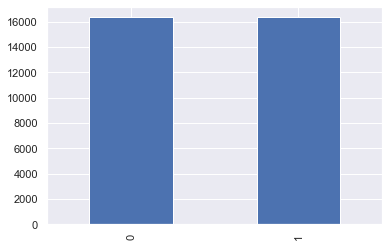

In [68]:
#after oversampling
y_train_ovsmp_cnt.plot(kind='bar')
plt.savefig('TCOVSP1.png', dpi=300, bbox_inches='tight')


Text(0.5, 1.0, 'Default Distribution')

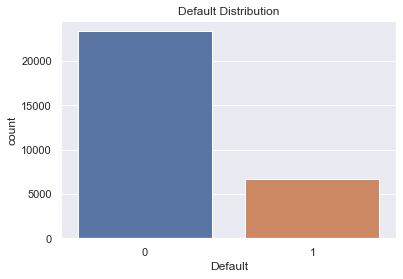

In [69]:
#Before Oversampling
sns.countplot(x='Default',data = df)
plt.savefig('plot77.png', dpi=300, bbox_inches='tight')
plt.title("Default Distribution")

## Applying Models (LR, SVM, RF)

In [70]:
#Logistic Regression Algorithm
lr = LogisticRegression()
model_lr = lr.fit(X_train_ovsmp,y_train_ovsmp)
pred_lr = model_lr.predict(X_test)
accuracy_score(y_test,pred_lr)


0.6822222222222222

In [71]:
confusion_matrix(y_test,pred_lr)

array([[4883, 2117],
       [ 743, 1257]], dtype=int64)

In [72]:
print('Classification report for test data is : \n',
      classification_report(y_test, pred_lr))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.87      0.70      0.77      7000
           1       0.37      0.63      0.47      2000

    accuracy                           0.68      9000
   macro avg       0.62      0.66      0.62      9000
weighted avg       0.76      0.68      0.71      9000



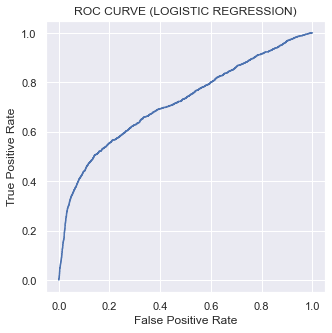

In [73]:
#plotting Roc Curve
plt.subplots(figsize = (5, 5))
# predict probabilities
lr_probs = model_lr.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, lr_probs)
#create ROC curve
plt.plot(fpr,tpr)
plt.title("ROC CURVE (LOGISTIC REGRESSION)")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('LRROC.png', dpi=300, bbox_inches='tight')
plt.show()

In [74]:
svm = svm.SVC(kernel='linear', C = 1.0, probability=True)
model_svm = svm.fit(X_train_ovsmp,y_train_ovsmp)
pred_svm =model_svm.predict(X_test)
accuracy_score(y_test,pred_svm)

0.757

In [75]:
confusion_matrix(y_test,pred_svm)

array([[5753, 1247],
       [ 940, 1060]], dtype=int64)

In [76]:
print('Classification report for test data is : \n',
      classification_report(y_test, pred_svm))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      7000
           1       0.46      0.53      0.49      2000

    accuracy                           0.76      9000
   macro avg       0.66      0.68      0.67      9000
weighted avg       0.77      0.76      0.76      9000



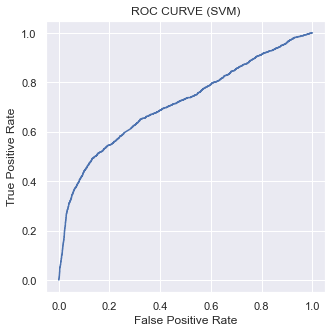

In [77]:
#plotting Roc Curve
plt.subplots(figsize = (5, 5))
# predict probabilities
svm_probs = model_svm.predict_proba(X_test)
svm_probs = svm_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, svm_probs)
#create ROC curve
plt.plot(fpr,tpr)
plt.title("ROC CURVE (SVM)")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('SVMROC.png', dpi=300, bbox_inches='tight')
plt.show()

In [78]:
rf = RandomForestClassifier(random_state=0)
model_rf = rf.fit(X_train_ovsmp,y_train_ovsmp)
pred_rf =model_rf.predict(X_test)
accuracy_score(y_test,pred_rf)

0.7892222222222223

In [79]:
confusion_matrix(y_test,pred_rf)

array([[6199,  801],
       [1096,  904]], dtype=int64)

In [80]:
print('Classification report for test data is : \n',
      classification_report(y_test, pred_rf))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      7000
           1       0.53      0.45      0.49      2000

    accuracy                           0.79      9000
   macro avg       0.69      0.67      0.68      9000
weighted avg       0.78      0.79      0.78      9000



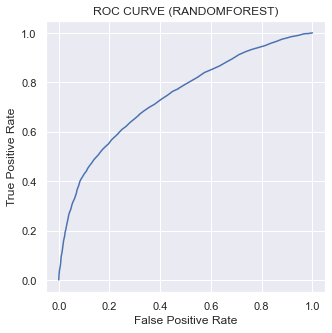

In [81]:
#plotting Roc Curve
plt.subplots(figsize = (5, 5))
# predict probabilities
rf_probs = model_rf.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, rf_probs)
#create ROC curve
plt.plot(fpr,tpr)
plt.title("ROC CURVE (RANDOMFOREST)")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('RFROC.png', dpi=300, bbox_inches='tight')
plt.show()

Text(0.5, 0, 'Feature Importance')

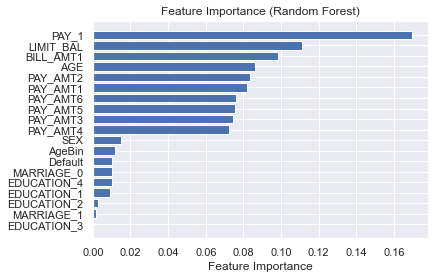

In [82]:
#feature importance for Random Forest
sort = rf.feature_importances_.argsort()[0:]
plt.barh(df1.columns[sort], model_rf.feature_importances_[sort])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Feature Importance")

## Comparing Model Performance

In [83]:
#Create Pipeline
model_pipeline = []
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(SVC())
model_pipeline.append(RandomForestClassifier())

In [84]:
#Create Model List
model_list = ['LogisticRegression', 'SVC', 'RandomForestClassifier']
accuracy_list = []
auc_list = []
confusion_matrix_list = []

In [85]:
#feature_names = [f"feature {i}" for i in range(X.shape[1])]
for model in model_pipeline:
    model.fit(X_train_ovsmp,y_train_ovsmp)
    y_pred = model.predict(X_test)
    y_pred = [int(i) for i in y_pred]
    y_train = [int(i) for i in y_train]
    accuracy_list.append(metrics.accuracy_score(y_test.astype(int), y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test.astype(int), y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr), 2))
    confusion_matrix_list.append(confusion_matrix(y_test.astype(int), y_pred))

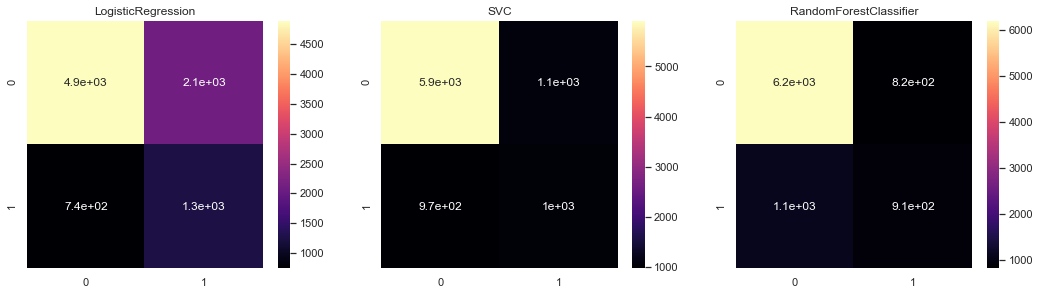

In [86]:
#Plot Confusion Matrix
fig = plt.figure(figsize = (18,10))
for i in range(len(confusion_matrix_list)):
    
    cm = confusion_matrix_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap='magma')

In [87]:
#Print result from pipeline
result = pd.DataFrame({'Model':model_list, 'Accuracy': accuracy_list, 'AUC':auc_list})
result

,Model,Accuracy,AUC
0,LogisticRegression,0.683000,0.66
1,SVC,0.770889,0.68
2,RandomForestClassifier,0.788333,0.67


<AxesSubplot:xlabel='Accuracy', ylabel='Model'>

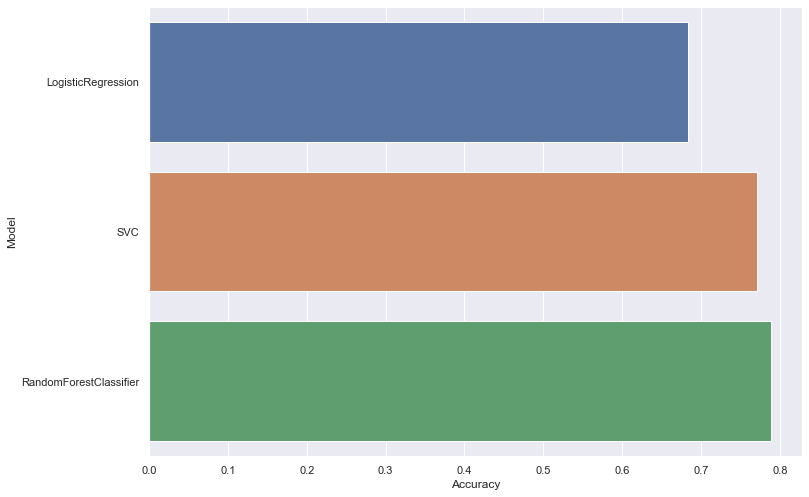

In [88]:
#Plot Result Comparison
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(data=result, x="Accuracy", y="Model",ax=ax)

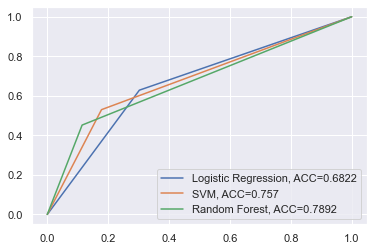

In [89]:
#plot a comparison Roc curve
plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_lr)
accuracy = round(metrics.accuracy_score(y_test, pred_lr), 4)
plt.plot(fpr,tpr,label="Logistic Regression, ACC="+str(accuracy))

#fit gradient boosted model and plot ROC curve

fpr, tpr, _ = metrics.roc_curve(y_test, pred_svm)
accuracy = round(metrics.accuracy_score(y_test, pred_svm), 4)
plt.plot(fpr,tpr,label="SVM, ACC="+str(accuracy))

fpr, tpr, _ = metrics.roc_curve(y_test, pred_rf)
accuracy = round(metrics.accuracy_score(y_test, pred_rf), 4)
plt.plot(fpr,tpr,label="Random Forest, ACC="+str(accuracy))


#add legend
plt.legend()

In [90]:
from sklearn.pipeline import Pipeline

## Hyperparameter tuning attempt

In [92]:
# Define Parameters
max_depth=[8, 16, 32]
n_estimators = [64, 128, 256]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

# Build the grid search
dfrst = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)
grid_results = grid.fit(X_train_ovsmp,y_train_ovsmp)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df

Best: [0.74428729 0.74352346 0.74407339 0.82040048 0.82260039 0.82180608
 0.8433473  0.84582239 0.84698341], using {'max_depth': 32, 'n_estimators': 256}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.835980,0.566472,0.132722,0.010337,8,64,"{'max_depth': 8, 'n_estimators': 64}",0.689581,0.740299,0.768561,0.754622,0.768373,0.744287,0.029274,7
1,6.093192,0.319052,0.172676,0.030878,8,128,"{'max_depth': 8, 'n_estimators': 128}",0.685915,0.741522,0.767339,0.754316,0.768526,0.743523,0.030435,9
2,12.407563,0.307014,0.336458,0.049292,8,256,"{'max_depth': 8, 'n_estimators': 256}",0.687901,0.741522,0.769019,0.754163,0.767762,0.744073,0.029823,8
3,5.104573,0.428649,0.146879,0.024609,16,64,"{'max_depth': 16, 'n_estimators': 64}",0.730064,0.811641,0.852582,0.848281,0.859435,0.820400,0.048112,6
4,10.340817,0.529112,0.325754,0.024937,16,128,"{'max_depth': 16, 'n_estimators': 128}",0.733272,0.809044,0.859762,0.849656,0.861268,0.822600,0.048521,4
5,23.547926,2.010459,0.610677,0.111906,16,256,"{'max_depth': 16, 'n_estimators': 256}",0.728384,0.811488,0.856095,0.852254,0.860810,0.821806,0.049917,5
6,6.711258,0.305711,0.212553,0.036765,32,64,"{'max_depth': 32, 'n_estimators': 64}",0.747479,0.828903,0.883135,0.875325,0.881895,0.843347,0.051944,3
7,14.157400,0.669435,0.411323,0.061397,32,128,"{'max_depth': 32, 'n_estimators': 128}",0.747327,0.833333,0.881760,0.877464,0.889228,0.845822,0.052980,2
8,23.771769,3.296293,0.759856,0.101936,32,256,"{'max_depth': 32, 'n_estimators': 256}",0.750076,0.835319,0.882371,0.877617,0.889534,0.846983,0.052016,1


In [93]:
# Extract the best decision forest 
best_clf = grid_results.best_estimator_
pred_rf_pt = best_clf.predict(X_test)

In [94]:
accuracy_score(y_test,pred_rf_pt)

0.7904444444444444

In [95]:
confusion_matrix(y_test,pred_rf_pt)

array([[6201,  799],
       [1087,  913]], dtype=int64)